In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from math import pi
from matplotlib import axes as axes

%matplotlib inline

# Data preprocessing

In [2]:
df=pd.read_csv("urop.csv")


# extract healthy echo data
df = df.drop(["IDshort",'SERNO','HistoCode'], 1)
mask=df["Cardiac_Category (0=good; 1=poor)"]==0
healthy_df=df[mask]
echo=healthy_df.iloc[:,19:55]

# fill in missing data
for col in echo.columns:
    echo[col].fillna(echo[col].mean(),inplace=True)

    
# data that form part of cardiac geometry    
left_ventricle=echo.iloc[:,1:8]
aorta=echo.iloc[:,8:9]
left_atrium=echo.iloc[:,9:10]
sinus=echo.iloc[:,-4:-2]

In [3]:
# Focus on left ventricle data
left_ventricle.head(3)

,IVSD__cm,IVSS__cm,LVIDD_cm,LVIDS_cm,LVPWD_cm,LVPWS_cm,LVOT__cm
3,0.7,0.9,4.0,2.7,0.6,1.1,2.00
7,1.0,1.5,6.1,4.0,1.2,1.7,2.25
12,0.7,1.2,4.3,2.4,0.8,1.3,1.93


In [4]:
# Extract mean dimensions of diff parts of left ventricle
a=left_ventricle.mean()

septum_d,septum_s=a[0],a[1]
dim_d,dim_s=a[2],a[3]
wall_d,wall_s=a[4],a[5]

# Plot rough shape of left ventricle

In [5]:
from math import pi
from matplotlib import axes as axes

In [6]:
def draw_shape(a):


    septum_d,septum_s=a[0],a[1]
    dim_d,dim_s=a[2],a[3]
    wall_d,wall_s=a[4],a[5]


    # Estimate shape using  parametric eqn of ellipse
    # x = u + a cos(t) ; y = v + b sin(t)

    u=0     #x-position of the center
    v=0   #y-position of the center
    a=4 #radius on the x-axis
    b=dim_d/2   #radius on the y-axis
    indices=[]

    t_all= np.linspace(0, 2*pi, 100)
    x_all=(u+a*np.cos(t_all))[::-1]
    y_all=(v+b*np.sin(t_all))[::-1]

    
    #remove x,y coordinates where y< (dim_s/2)

    for i,(x,y) in enumerate(zip(x_all,y_all)):
        if y<=dim_s/2:
            indices+=[i]


    x=np.delete(x_all,indices)
    y=np.delete(y_all,indices)
    
    y_s=y + septum_d
    y_w= -y - wall_d
    
    
    
    # Split the ellipse into 2 (left and right)

    ys_left=y_s[:np.argmax(y_s)+1]
    xs_left=x[:np.argmax(y_s)+1]
    yw_left=y_w[:np.argmin(y_w)+1]
    xw_left=xs_left

    ys_right=y_s[np.argmax(y_s):]
    xs_right=x[np.argmax(y_s):]
    yw_right=y_w[np.argmin(y_w):]
    xw_right=xs_right
    
    # Ensure that the right side of the ellipse do not go under the straight line

    indices=np.where(ys_right< (y[-1]+ septum_s))
    indices_1=np.where(yw_right > (-y[-1]-wall_s))

    ys_right = np.delete(ys_right, indices)
    xs_right= np.delete(xs_right, indices)
    yw_right=np.delete(yw_right,indices_1)
    xw_right=np.delete(xw_right,indices_1)
    
    
    # Estimate shape of LVIDs using a horizontal line
    
    x_more=np.linspace(x[-1],6,100)
    y_more=np.linspace(y[-1],y[-1],100)
    ys_more=np.linspace(y[-1]+ septum_s,y[-1] + septum_s,100)
    yw_more=np.linspace(-y[-1]-wall_s,-y[-1] - wall_s,100)
    xs_more=np.linspace(xs_right[-1],6,100)
    xw_more=np.linspace(xw_right[-1],6,100)
    
    
    # Add all the x,y coordinates respectively

    x=np.concatenate((x,x_more),axis=None)
    y=np.concatenate((y,y_more),axis=None)
    y_s=np.concatenate((ys_left,ys_right,ys_more),axis=None)
    x_s=np.concatenate((xs_left,xs_right,xs_more),axis=None)
    y_w=np.concatenate((yw_left,yw_right,yw_more),axis=None)
    x_w=np.concatenate((xw_left,xw_right,xw_more),axis=None)
    
    # Plot the graphs

    
    plt.grid(color='lightgray',linestyle='--')
    plt.xlim(-4, 6)
    plt.ylim(-4, 4)
    plt.plot(x,y)
    plt.plot(x,-y)
    plt.plot(x_s,y_s)
    plt.plot(x_w,y_w)
    plt.show()

In [39]:
a

IVSD__cm    0.778571
IVSS__cm    1.178095
LVIDD_cm    4.376667
LVIDS_cm    2.440476
LVPWD_cm    0.759524
LVPWS_cm    1.421667
LVOT__cm    2.022857
dtype: float64

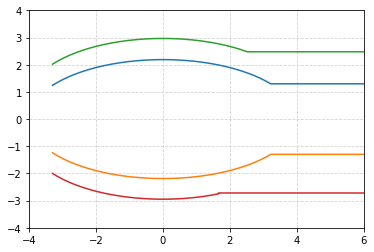

In [37]:
draw_shape(a)

In [40]:
b

IVSD__cm    0.7
IVSS__cm    0.9
LVIDD_cm    4.0
LVIDS_cm    2.7
LVPWD_cm    0.6
LVPWS_cm    1.1
LVOT__cm    2.0
Name: 3, dtype: float64

In [41]:
b=np.squeeze(left_ventricle.iloc[:1,:])
b

IVSD__cm    0.7
IVSS__cm    0.9
LVIDD_cm    4.0
LVIDS_cm    2.7
LVPWD_cm    0.6
LVPWS_cm    1.1
LVOT__cm    2.0
Name: 3, dtype: float64

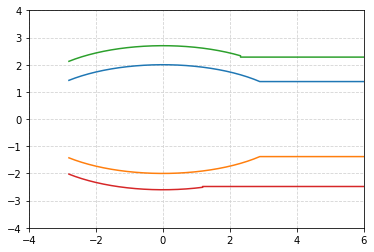

In [36]:
draw_shape(b)

In [43]:
c=np.squeeze(left_ventricle.iloc[40:41,:])
c

IVSD__cm    1.0
IVSS__cm    1.6
LVIDD_cm    5.0
LVIDS_cm    2.7
LVPWD_cm    0.7
LVPWS_cm    1.5
LVOT__cm    2.2
Name: 83, dtype: float64

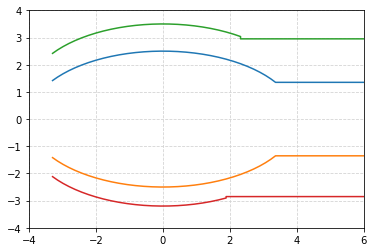

In [44]:
draw_shape(c)

In [ ]:
KK